# blinkit data analysis project

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#loading the dataframe
df = pd.read_excel(r'C:\Users\HP\Downloads\BlinkIT Grocery Data (1).xlsx')
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [3]:
#checking if all the data is imported properly
df.shape

(8523, 12)

In [4]:
#getting the column information so that its easy to work
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [5]:
#getting data types so that i can keep it in my mind
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [6]:
#printing the distinct value from this column
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [7]:
#converting all the irregular name of a column
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat',
                                                      'reg':'Regular'})
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### KPI requirements

In [9]:
#total sales
total_sales=df['Sales'].sum()

#average sales
average_sales=df['Sales'].mean()

#no of items
no_of_items=df['Sales'].count()

#average rating
average_rating=df['Rating'].mean()

#now the printing part
print(f"Total Sales : ${total_sales:,.1f}")
print(f"Average Sales : ${average_sales:,.1f}")
print(f"no of items : {no_of_items:,.0f}")
print(f"Average Rating : {average_rating:,.1f}")

Total Sales : $1,201,681.5
Average Sales : $141.0
no of items : 8,523
Average Rating : 4.0


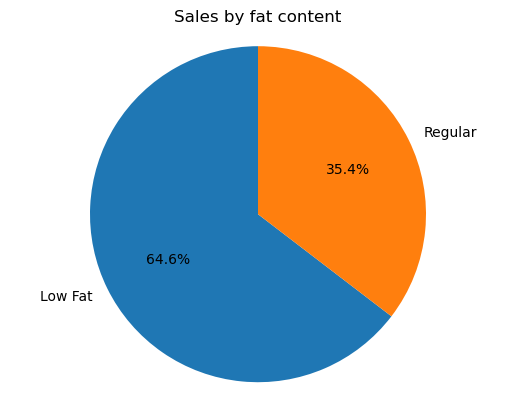

In [13]:
#total sales by fat content
sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat, labels=sales_by_fat.index,
       autopct='%.1f%%',
       startangle=90)
plt.title('Sales by fat content')
plt.axis('equal')
plt.show()

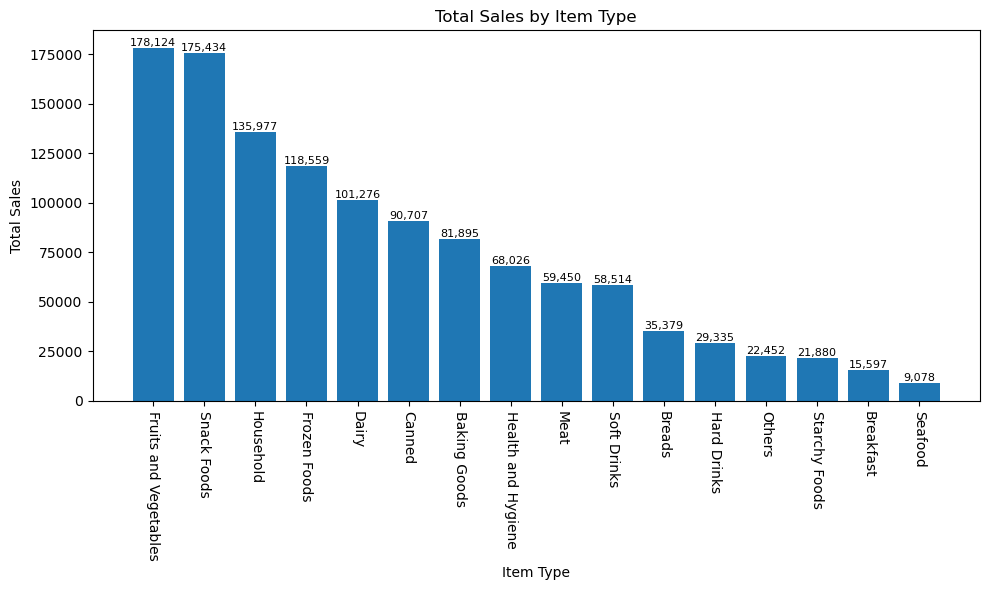

In [15]:
#total sales by item type
sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars=plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),
            f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)
plt.tight_layout()
plt.show()

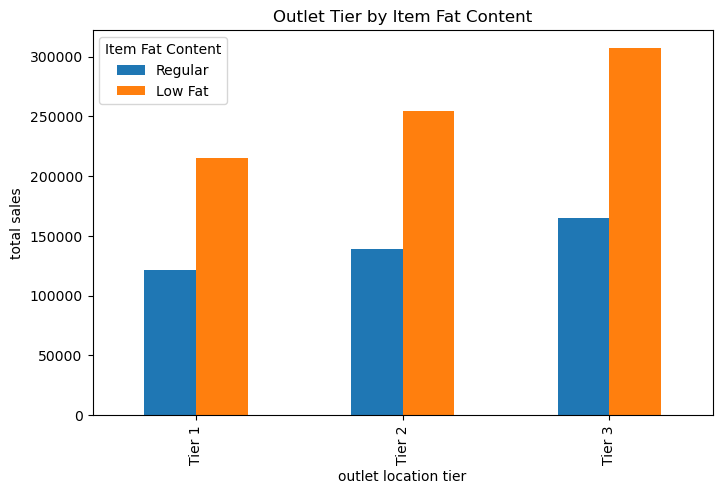

In [18]:
#fat content by outlet for total sales
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]

ax=grouped.plot(kind='bar',figsize=(8,5),title='Outlet Tier by Item Fat Content')
plt.xlabel('outlet location tier')
plt.ylabel('total sales')
plt.legend(title='Item Fat Content')
plt.show()

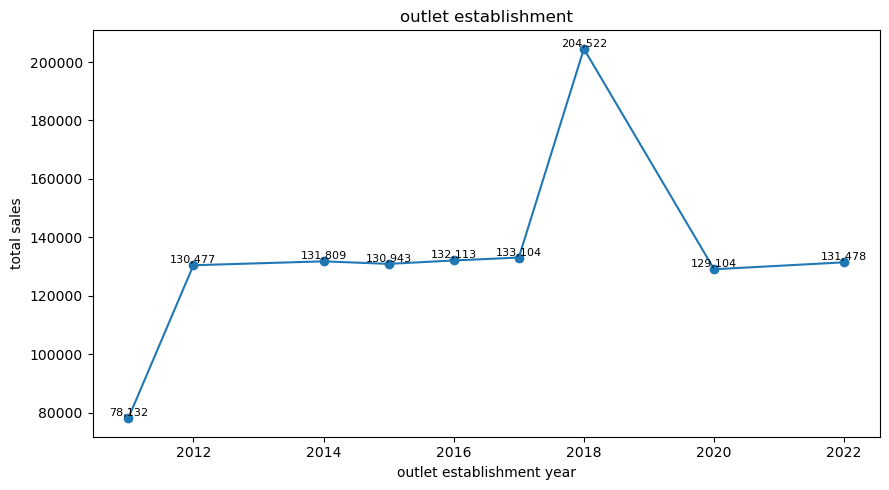

In [20]:
#total sales by outlet establishment
sales_by_year=df.groupby('Outlet Establishment Year') ['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,sales_by_year,marker='o',linestyle='-')

plt.xlabel('outlet establishment year')
plt.ylabel('total sales')
plt.title('outlet establishment')

for x,y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}',ha='center',va='bottom',fontsize=8)

plt.tight_layout()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'tigh_layout'

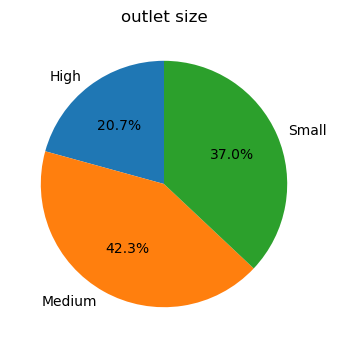

In [21]:
#sales by outlet size
sales_by_size=df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels=sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.title('outlet size')
plt.tigh_layout()
plt.show()